In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 16:58:04,009 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 16:58:04,012 - settings - Setting database.user to celiib
INFO - 2021-04-24 16:58:04,013 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 16:58:04,017 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 16:58:04,017 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 16:58:04,031 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 16:58:04,455 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 16:58:04,457 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 16:58:04,458 - settings - Setting database.user to celiib
INFO - 2021-04-24 16:58:04,458 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 16:58:04,459 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 16:58:04,459 - settings - Setting database.user to celiib
INFO - 2021-04-24 16:58:04,460 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 16:58:04,461 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 16:58:04,893 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 16:58:05,020 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 16:58:05,021 - settings - Setting database.user to celiib
INFO - 2021-04-24 16:58:05,022 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 16:58:05,024 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 16:58:05,534 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 0
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691135735426708, 864691135589907979, 864691136311791677,
       864691135866394390, 864691135699269154])


--- Working on Neuron 864691135735426708 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [952843.51814256 721495.48079465 892770.5214423 ]--------
coordinate [952843.51814256 721495.48079465 892770.5214423 ] had error branches []--------


 ----- Working on coordinate [952914.49432777 723390.18047849 892213.25320765]--------
coordinate [952914.49432777 723390.18047849 892213.25320765] had error branches [5, 8]--------


 ----- Working on coordinate [953591.80783338 725111.14459654 891563.26828903]--------
coordinate [953591.80783338 725111.14459654 891563.26828903] had error branches [5, 8, 3, 6]--------


 ----- Working on coordinate [961190.93661969 737751.84969255 888403.8753735 ]--------
coordinate [961190.93661969 737751.84969255 888403.8753735 ] had error branches [5, 8, 3, 6, 10, 4]--------


 ----- Working on coordinate [962574.04356769 739287.7161242  887621.52346369]--------
coordinate [962574.04356769 739287.7161242  887621.523463

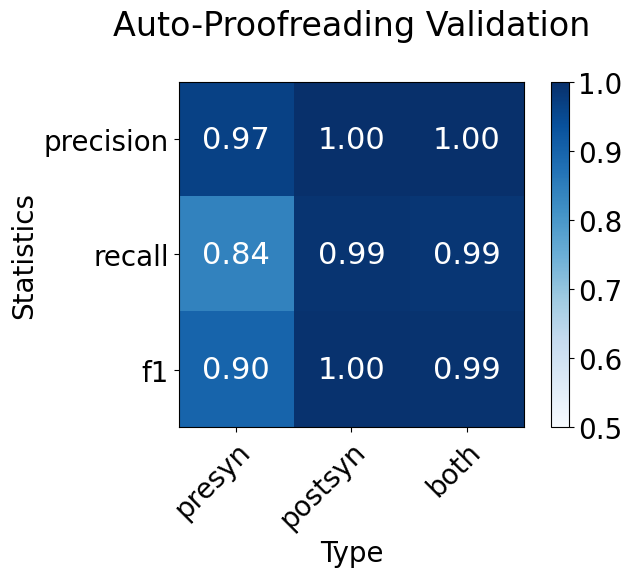

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135735426708_validation_df.pbz2
File size is 0.075204 MB
Total time for neuron 864691135735426708: 213.56547164916992

--- Working on Neuron 864691135589907979 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1180217.83950051  806216.75917429  989165.74480419]--------
coordinate [1180217.83950051  806216.75917429  989165.74480419] had error branches []--------


 ----- Working on coordinate [1181266.76099576  800202.03181104  988769.31380618]--------
coordinate [1181266.76099576  800202.03181104  988769.31380618] had error branches [11, 12]--------


 ----- Working on coordinate [1202756.56199116  791408.14908579  998293.2836805 ]--------
coordinate [1202756.56199116  791408.14908579  998293.2836805 ] had error branches [11, 12, 17, 3]--------


 ----- Working on coordinate [1226768.91265769  786984.52122406  975557.18515421]--------
coordinate [1

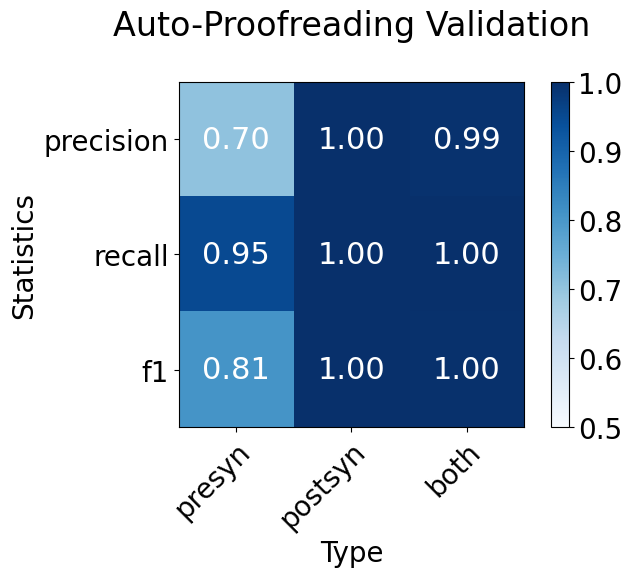

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135589907979_validation_df.pbz2
File size is 0.089285 MB
Total time for neuron 864691135589907979: 192.89163613319397

--- Working on Neuron 864691136311791677 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [833027.34636694 758702.0865743  901936.25102521]--------
coordinate [833027.34636694 758702.0865743  901936.25102521] had error branches []--------


 ----- Working on coordinate [866250. 757323. 875952.]--------
coordinate [866250. 757323. 875952.] had error branches [13, 16, 18]--------


 ----- Working on coordinate [1221456.34204044  724568.28233463  977648.85747771]--------
coordinate [1221456.34204044  724568.28233463  977648.85747771] had error branches [13, 16, 18, 45, 47]--------


 ----- Working on coordinate [1234341.   717316.9  981884.7]--------
coordinate [1234341.   717316.9  981884.7] had error branches [13, 16, 18, 45, 47, 69

limb_branch_dict_to_cancel = {'L1': [52, 60]}
limb_branch_dict_to_cancel = {'L1': [16], 'L3': [2, 11]}
limb_branch_dict_to_cancel = {'L1': array([63, 68])}
Apply the presyn non_error
For presyn: # valid synapses = 133, # error synapses  = 313, # error presyns = 33
For postsyn: # valid synapses = 6884, # error synapses  = 129, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 133
n_errored_syn_ids_presyn = 313
n_valid_syn_ids_postsyn = 6884
n_errored_syn_ids_postsyn = 129
Segment Id = 864691136311791677
Postsyn counts:
TP:6876
TN:33
FP:8
FN:96
Presyn counts:
TP:115
TN:278
FP:18
FN:2


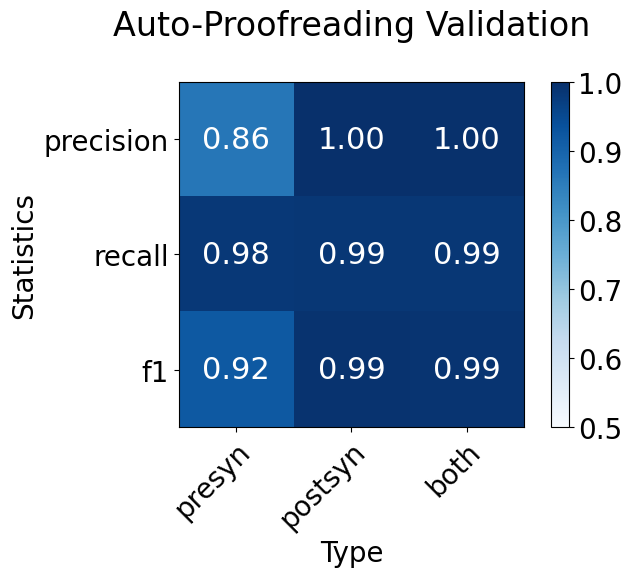

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136311791677_validation_df.pbz2
File size is 0.147825 MB
Total time for neuron 864691136311791677: 600.7015569210052

--- Working on Neuron 864691135866394390 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1169053.   553487.8  981425.8]--------
coordinate [1169053.   553487.8  981425.8] had error branches []--------


 ----- Working on coordinate [1173955.86270029  442756.23296947 1021484.03436415]--------
coordinate [1173955.86270029  442756.23296947 1021484.03436415] had error branches [65, 47]--------


 ----- Working on coordinate [1192234.27110897  643883.56195061  940473.45718232]--------
coordinate [1192234.27110897  643883.56195061  940473.45718232] had error branches [65, 47, 93, 91]--------


 ----- Working on coordinate [1199306.00817671  510376.33644948  980764.88730506]--------
coordinate [1199306.00817671  510376.33644948  980764.8

coordinate [1300649.12558809  497602.26803224  917413.44831062] had error branches [65, 47, 93, 91, 124, 126, 150, 567, 106, 168, 160, 161, 163, 165, 149, 179, 184, 191, 195, 189, 218, 223, 207, 222, 225, 255, 256, 258, 262, 268, 269, 230, 303, 249, 309, 328, 313, 332, 333, 342, 380, 384, 381, 386, 398, 404, 414, 418, 443, 430, 417, 444, 459, 431, 457, 468]--------


 ----- Working on coordinate [1307398.23027724  700232.40269463  902183.70304583]--------
coordinate [1307398.23027724  700232.40269463  902183.70304583] had error branches [65, 47, 93, 91, 124, 126, 150, 567, 106, 168, 160, 161, 163, 165, 149, 179, 184, 191, 195, 189, 218, 223, 207, 222, 225, 255, 256, 258, 262, 268, 269, 230, 303, 249, 309, 328, 313, 332, 333, 342, 380, 384, 381, 386, 398, 404, 414, 418, 443, 430, 417, 444, 459, 431, 457, 468, 461, 463, 464]--------


 ----- Working on coordinate [1308355.33906506  701219.17619386  902322.19686152]--------
coordinate [1308355.33906506  701219.17619386  902322.19686152] h

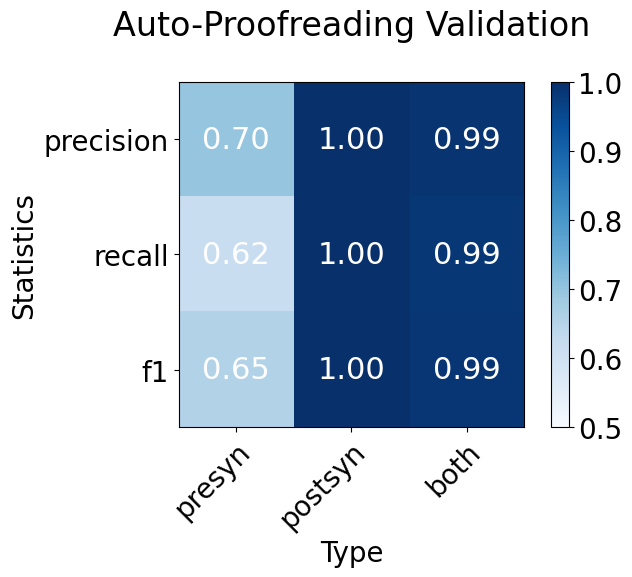

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135866394390_validation_df.pbz2
File size is 0.197422 MB
Total time for neuron 864691135866394390: 347.30215883255005

--- Working on Neuron 864691135699269154 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1309321.39007609  914713.82912712  816313.38108701]--------
coordinate [1309321.39007609  914713.82912712  816313.38108701] had error branches []--------


 ----- Working on coordinate [1317823.07293151  976683.79400696  857337.88269294]--------
coordinate [1317823.07293151  976683.79400696  857337.88269294] had error branches []--------


 ----- Working on coordinate [1318812.59518286  975232.71027136  856659.44339789]--------
coordinate [1318812.59518286  975232.71027136  856659.44339789] had error branches []--------


 ----- Working on coordinate [1322491.   783959.4  776025.1]--------
coordinate [1322491.   783959.4  776025.1] had error 

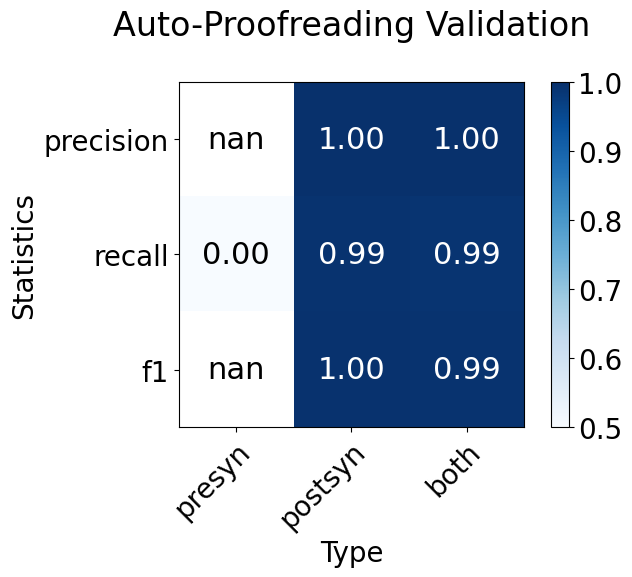

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135699269154_validation_df.pbz2
File size is 0.095948 MB
Total time for neuron 864691135699269154: 208.47238183021545


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")